In [12]:
# Import library yang dibutuhkan untuk analisis dan visualisasi
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Membaca data CSV Spotify 2023
df = pd.read_csv("/content/spotify-2023.csv", encoding='ISO-8859-1')  # Menghindari UnicodeDecodeError dengan encoding alternatif

# Menampilkan 5 baris pertama dari dataset
df.head()

# Melihat tipe data dan jumlah missing values
df.info()

# Menampilkan ringkasan statistik untuk fitur numerik
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,1.556139,2018.238195,6.033578,13.930745,5200.124869,12.009444,67.812172,51.908709,2.666317,122.540399,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165
std,0.893044,11.116218,3.566435,9.201949,7897.608990,19.575992,86.441493,50.630241,6.035599,28.057802,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,875.000000,0.000000,13.000000,7.000000,0.000000,100.000000,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,34.000000,38.000000,0.000000,121.000000,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,88.000000,87.000000,2.000000,140.000000,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,672.000000,275.000000,58.000000,206.000000,96.00000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


# **🧪 EDA dan Data Visualization**

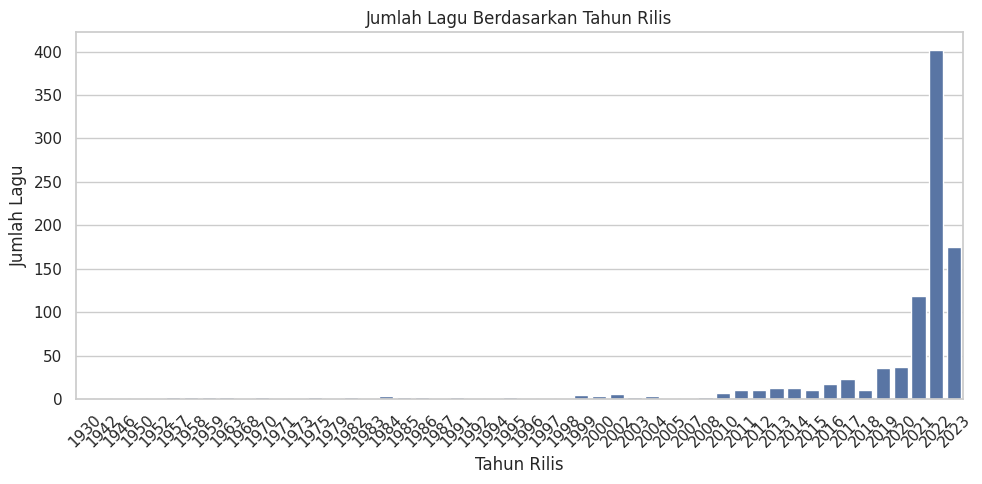

In [13]:
# Melihat kolom mana saja yang ada di dataset
df.columns

# Menampilkan distribusi lagu berdasarkan tahun rilis
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='released_year', order=sorted(df['released_year'].unique()))
plt.title("Jumlah Lagu Berdasarkan Tahun Rilis")
plt.xlabel("Tahun Rilis")
plt.ylabel("Jumlah Lagu")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<ipython-input-14-4d6e5fe229d9>:12: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


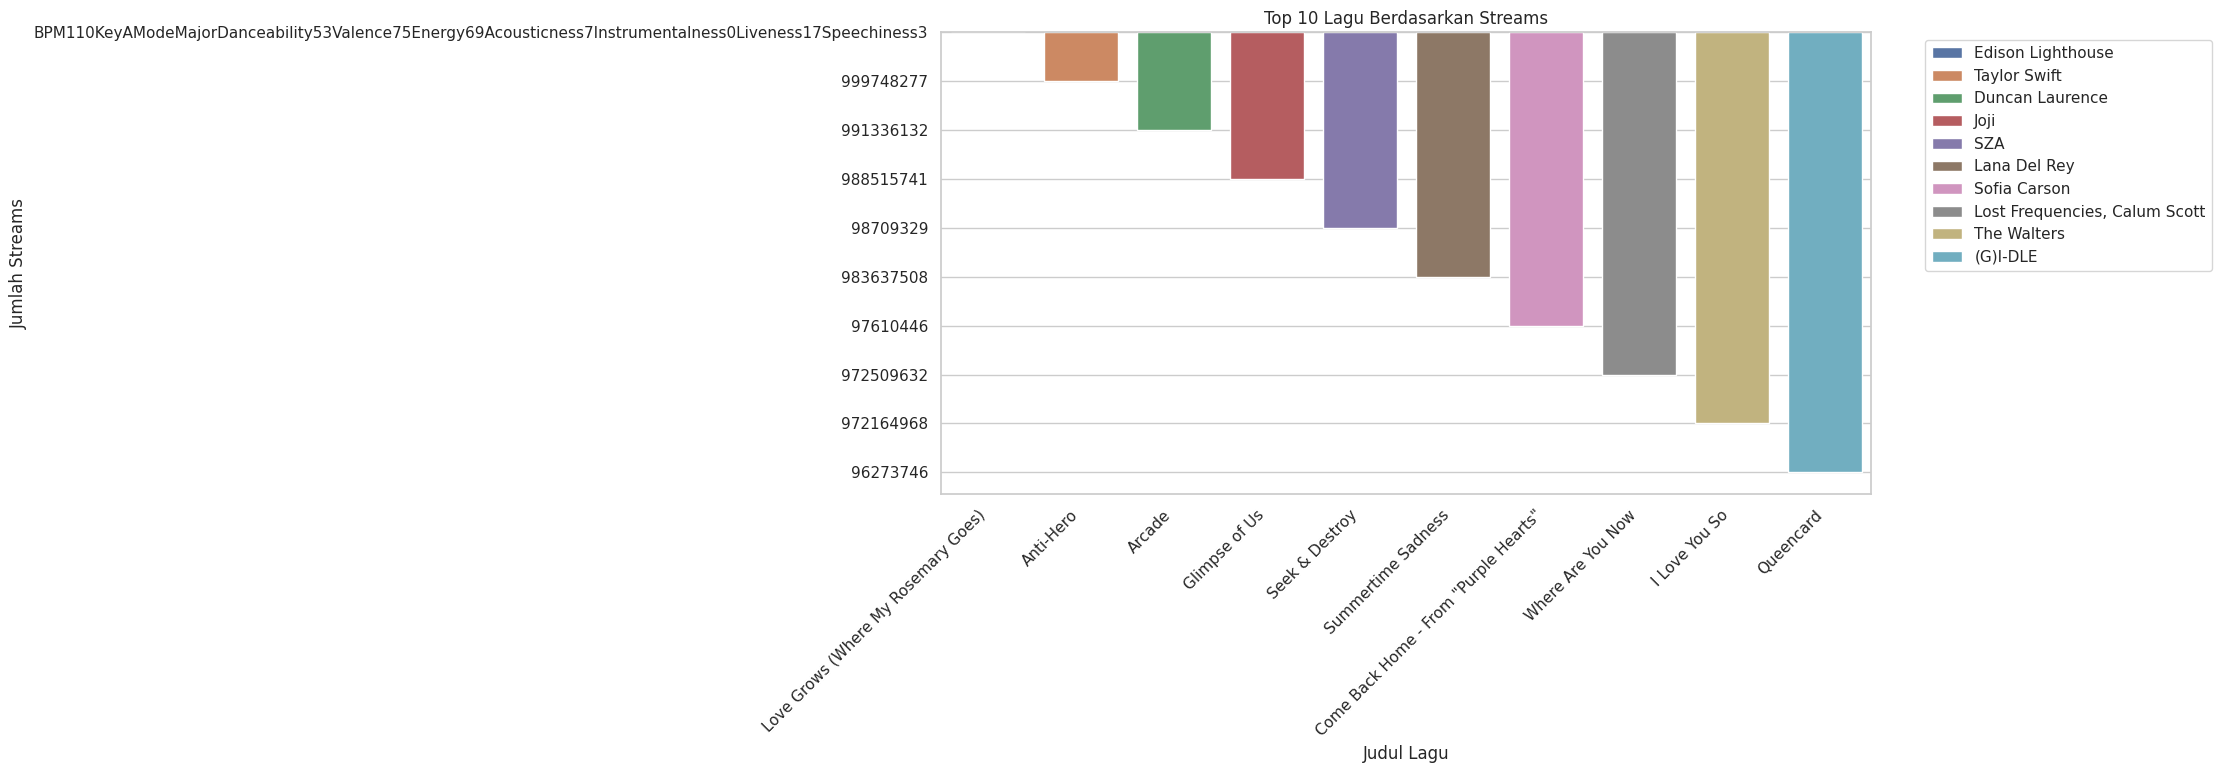

In [14]:
# Melihat 10 lagu dengan stream terbanyak
top10 = df.sort_values(by='streams', ascending=False).head(10)

# Visualisasi 10 lagu teratas berdasarkan streams
plt.figure(figsize=(12, 6))
sns.barplot(data=top10, x='track_name', y='streams', hue='artist(s)_name')
plt.xticks(rotation=45, ha='right')
plt.title("Top 10 Lagu Berdasarkan Streams")
plt.xlabel("Judul Lagu")
plt.ylabel("Jumlah Streams")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


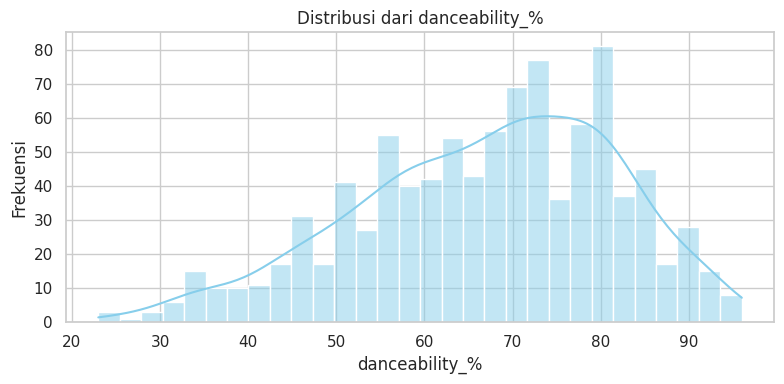

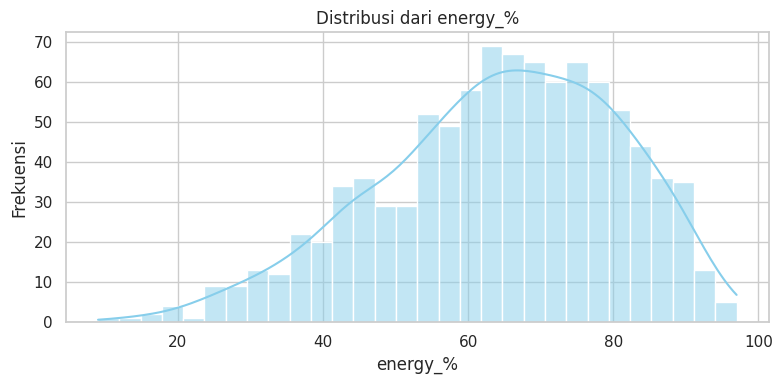

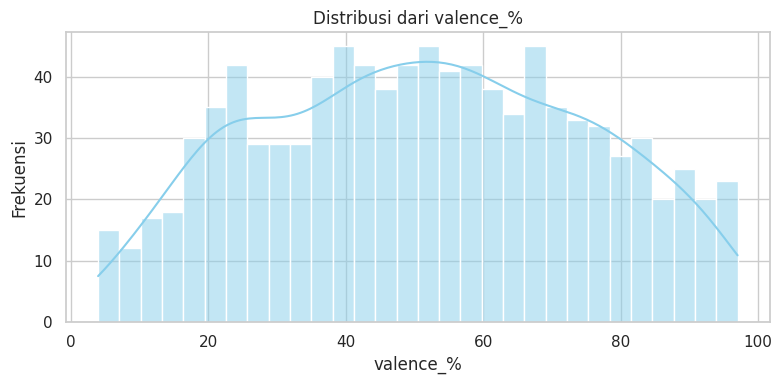

In [15]:
# Mengambil subset fitur numerik yang berkaitan dengan karakteristik lagu
features = ['danceability_%', 'energy_%', 'valence_%']

# Menampilkan distribusi tiap fitur dengan histplot
for feature in features:
    plt.figure(figsize=(8,4))
    sns.histplot(df[feature], bins=30, kde=True, color='skyblue')
    plt.title(f'Distribusi dari {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frekuensi')
    plt.tight_layout()
    plt.show()


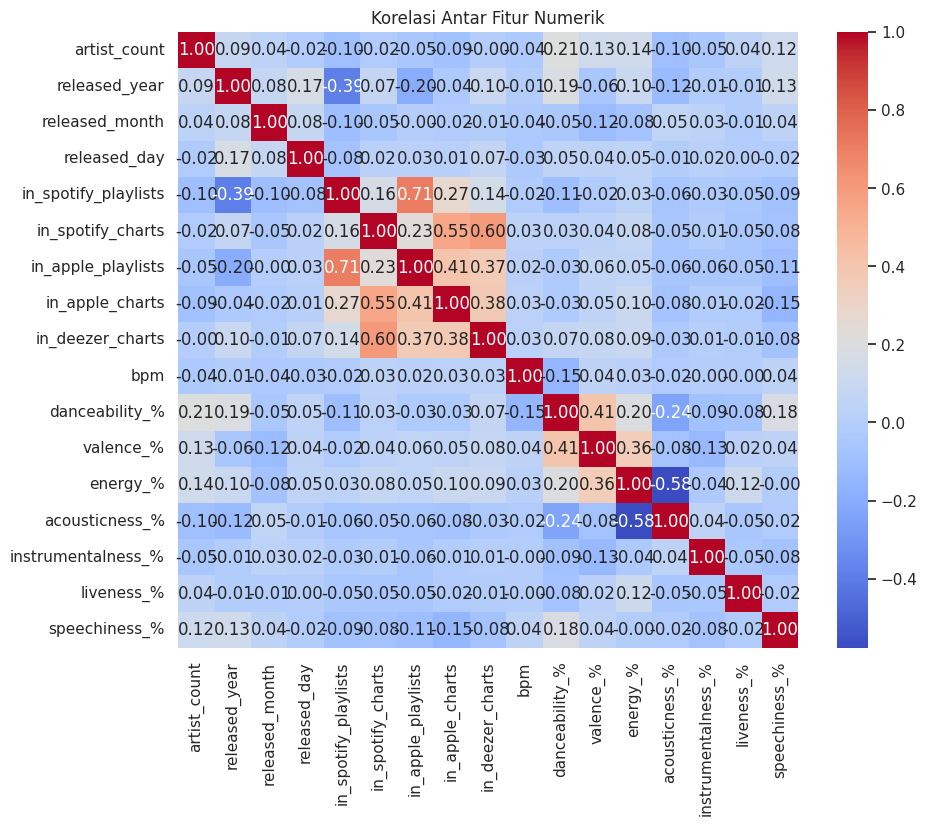

In [16]:
# Menghitung korelasi antar fitur numerik
corr = df.corr(numeric_only=True)

# Visualisasi korelasi menggunakan heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Korelasi Antar Fitur Numerik")
plt.show()


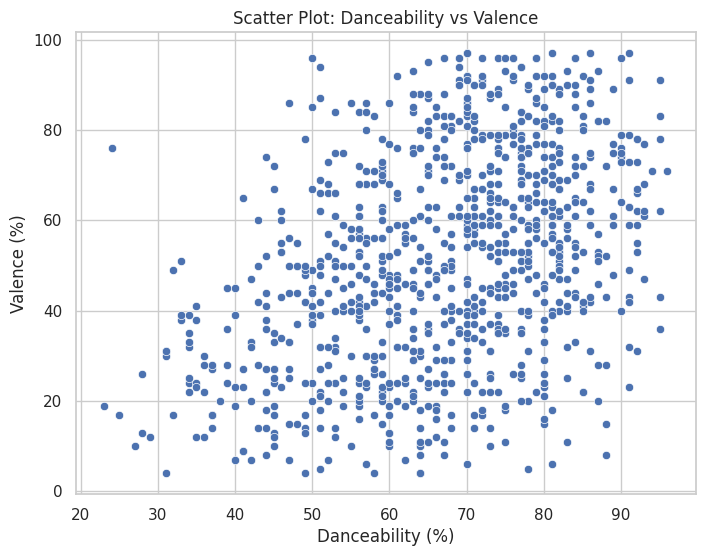

In [17]:
# Melihat hubungan danceability dan valence menggunakan scatterplot
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='danceability_%', y='valence_%')
plt.title("Scatter Plot: Danceability vs Valence")
plt.xlabel("Danceability (%)")
plt.ylabel("Valence (%)")
plt.show()


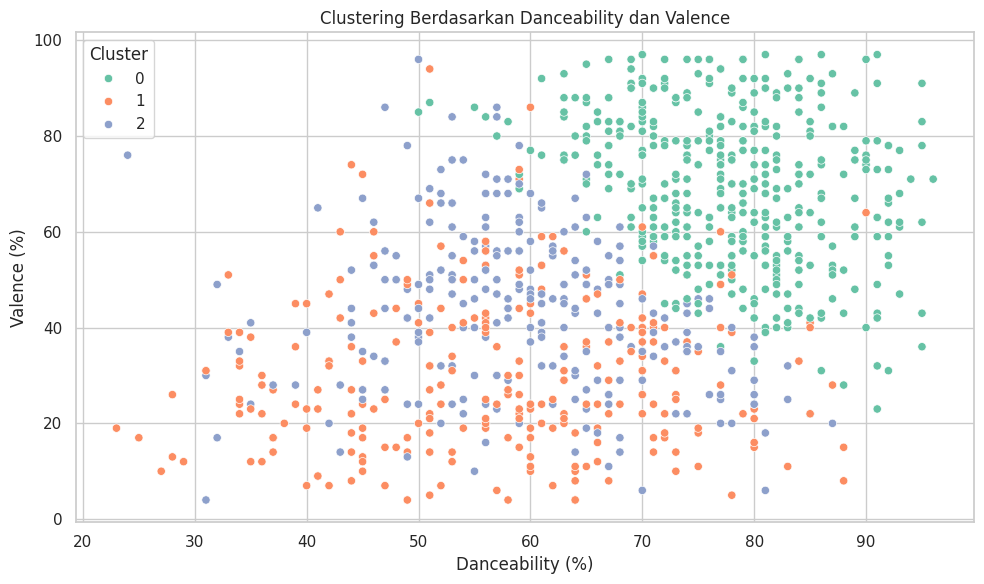

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Memilih fitur yang akan digunakan untuk clustering
X = df[['danceability_%', 'energy_%', 'valence_%']].dropna()

# Melakukan standardisasi fitur agar rata-rata = 0 dan standar deviasi = 1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Clustering menggunakan KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

# Visualisasi hasil clustering
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='danceability_%', y='valence_%', hue='cluster', palette='Set2')
plt.title("Clustering Berdasarkan Danceability dan Valence")
plt.xlabel("Danceability (%)")
plt.ylabel("Valence (%)")
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()


> 📌 **Penjelasan Matematis:**

- Dalam analisis korelasi pada notebook ini, digunakan **Pearson Correlation Coefficient**, yaitu:

  $$
  r = \frac{\sum{(x_i - \bar{x})(y_i - \bar{y})}}{\sqrt{\sum{(x_i - \bar{x})^2} \sum{(y_i - \bar{y})^2}}}
  $$

- **Keterangan**:
  - $x_i$: nilai data ke-i dari variabel X  
  - $y_i$: nilai data ke-i dari variabel Y  
  - $\bar{x}$: rata-rata dari variabel X  
  - $\bar{y}$: rata-rata dari variabel Y  
  - $r$: koefisien korelasi Pearson  

- **Fungsi utama**:
  - Mengukur kekuatan dan arah hubungan **linear** antara dua fitur numerik.

- **Interpretasi nilai $r$**:
  - $r = 1$: hubungan positif sempurna  
  - $r = 0$: tidak ada korelasi linear  
  - $r = -1$: hubungan negatif sempurna  

- **Penerapan di notebook**:
  - Digunakan untuk membuat **heatmap korelasi** dengan `seaborn.heatmap(df.corr())`
  - Membantu mengidentifikasi fitur mana yang paling berkaitan dengan popularitas lagu atau metrik lain.

- Korelasi hanya mengukur **hubungan linear**, dan tidak berarti **sebab-akibat (causality)**.


## 📌 Kesimpulan Analisis Spotify Charts 2023 setelah dilakukan Reproduce Codenya


- 🎧 **Top Lagu**: Lagu-lagu dari artis besar seperti Taylor Swift, The Weeknd, dan Drake mendominasi chart.
- 📈 **Karakteristik Populer**: Lagu dengan nilai **danceability**, **energy**, dan **valence** yang tinggi cenderung lebih populer.
- 🔁 **Korelasi Positif** ditemukan antara fitur-fitur ini, terutama antara danceability dan valence.
- 🔍 **Clustering** mengungkapkan bahwa lagu-lagu dapat dikelompokkan berdasarkan vibe musik (ceria, enerjik, netral), yang dapat digunakan untuk sistem rekomendasi.
- 📅 **Tren Tahun Rilis** menunjukkan banyak lagu baru dari 2022–2023 yang berhasil masuk chart.

🎵 Lagu yang “hit” biasanya upbeat, menyenangkan, dan energik!
